# RFM Müşteri Segmentasyonu

## RFM Analizi (Recency - Frequency - Monetary) nedir ?
- RFM analizi, müşteri segmentasyonu yapmak için kullanılan bir yöntem olup, müşterileri satın alma zamanına (recency), alışveriş sıklığına (frequency) ve harcama tutarına (monetary) göre değerlendirerek en değerli müşteri gruplarını belirlemeye yardımcı olur.
    * Recency : Müşterinin en son ne zaman alışveriş yaptığı
    * Frequency : Müşterinin belirli bir zaman diliminde kaç kez alışveriş yaptığı
    * Monetary : Müşterinin toplam harcama tutarı

## İş Problemi
* Türkiyede önde gelen online ayakkabı mağazası, müşterilerini segmentlere ayırıp bu segmentere göre pazarlama stratejileri belirlemek istiyor. Buna yönelik olarak müşterilerin davranışları tanımlanacak ve bu davranışlardaki öbeklenmelere göre gruplar oluşturulacak.

## Veri Seti Hikayesi
* Veri seti, son alışverişlerin 2020-2021 yıllarında OmniChannel (hem online hem ofline alışveriş yapan) olarak müşterilerin geçmiş alışveriş davranışlarından elde edilen bilgilerden oluşmaktadır.

## Değişkenler
* master_id: Eşsiz müşteri numarası
* order_channel : Alışveriş yapılan platforma ait hangi kanalın kullanıldığı (Android, ios, Desktop, Mobile, Offline)
* last_order_channel : En son alışverişin yapıldığı kanal
* first_order_date : Müşterinin yaptığı ilk alışveriş tarihi
* last_order_date : Müşterinin yaptığı son alışveriş tarihi
* last_order_date_online : Muşterinin online platformda yaptığı son alışveriş tarihi
* last_order_date_offline : Muşterinin offline platformda yaptığı son alışveriş tarihi
* order_num_total_ever_online : Müşterinin online platformda yaptığı toplam alışveriş sayısı
* order_num_total_ever_offline : Müşterinin offline'da yaptığı toplam alışveriş sayısı
* customer_value_total_ever_offline : Müşterinin offline alışverişlerinde ödediği toplam ücret
* customer_value_total_ever_online : Müşterinin online alışverişlerinde ödediği toplam ücret
* interested_in_categories_12 : Müşterinin son 12 ayda alışveriş yaptığı kategorilerin listesi


## 1) Veriyi Anlama ve Hazırlama

In [9]:
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [5]:
df = pd.read_csv("data_20k.csv")

In [12]:
def explore_dataframe(df):
    print("📌 İlk 10 Satır:\n", df.head(), "\n" + "-"*50)
    print("📌 Kolonlar:\n", df.columns, "\n" + "-"*50)
    print("📌 Şekil (Satır, Sütun):\n", df.shape, "\n" + "-"*50)
    print("📌 Açıklayıcı İstatistikler:\n", df.describe().T, "\n" + "-"*50)
    print("📌 Eksik Veri Sayısı:\n", df.isnull().sum(), "\n" + "-"*50)
    print("📌 Veri Bilgisi:")
    df.info()

explore_dataframe(df)

📌 İlk 10 Satır:
                               master_id order_channel last_order_channel  \
0  cc294636-19f0-11eb-8d74-000d3a38a36f   Android App            Offline   
1  f431bd5a-ab7b-11e9-a2fc-000d3a38a36f   Android App             Mobile   
2  69b69676-1a40-11ea-941b-000d3a38a36f   Android App        Android App   
3  1854e56c-491f-11eb-806e-000d3a38a36f   Android App        Android App   
4  d6ea1074-f1f5-11e9-9346-000d3a38a36f       Desktop            Desktop   

  first_order_date last_order_date last_order_date_online  \
0       2020-10-30      2021-02-26             2021-02-21   
1       2017-02-08      2021-02-16             2021-02-16   
2       2019-11-27      2020-11-27             2020-11-27   
3       2021-01-06      2021-01-17             2021-01-17   
4       2019-08-03      2021-03-07             2021-03-07   

  last_order_date_offline  order_num_total_ever_online  \
0              2021-02-26                         4.00   
1              2020-01-10                  

* Toplam 19945 satır ve 12 sütun bulunuyor.
*  Online ve offline siparişlerin toplam sayısı ve müşteri harcamaları için ortalama, min, max, çeyreklik değerler verilmiş, müşteri harcamalarının geniş bir aralıkta değiştiği ve bazı müşterilerin çok yüksek harcamalar yaptığı görülüyor (max değerleri çok büyük).
* Veri setinde eksik veri bulunmuyor.

### Order channel ve last_order_channel'ın pie chartına bakalım.

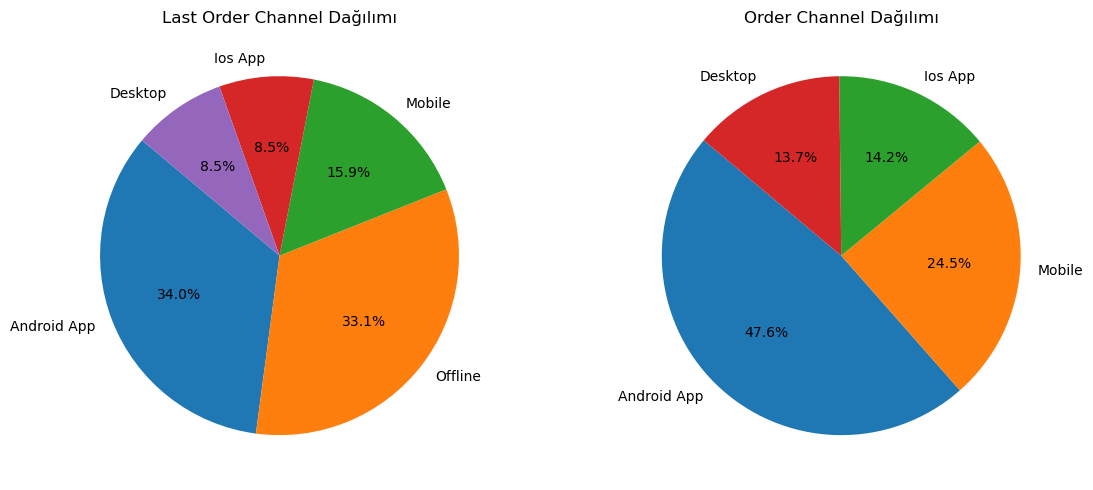

In [16]:
last_order_channel_counts = df["last_order_channel"].value_counts()
order_channel_counts = df["order_channel"].value_counts()

# Pie Chart - last_order_channel
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.pie(last_order_channel_counts, labels=last_order_channel_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Last Order Channel Dağılımı")

# Pie Chart - order_channel
plt.subplot(1, 2, 2)
plt.pie(order_channel_counts, labels=order_channel_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Order Channel Dağılımı")

plt.tight_layout()
plt.show()

#### Bu iki grafiğe göre çıkarımlar yaparsak,
* Müşteriler, sipariş vermek için genellikle Android App'i kullanıyor ancak son siparişlerinde bu oran biraz düşmüş, bu da kanal tercihinin çeşitlendiğini gösteriyor.
* Offline siparişlerin azalmaya başlaması, müşterilerin giderek daha fazla dijitalleştiğini gösteriyor.
* Desktop sipariş oranındaki düşüş, masaüstü kullanıcılarının azaldığını ve mobil platformların öne çıktığını gösteriyor.
* iOS App kullanımında hafif bir artış var, bu da Apple kullanıcılarının ilgisinin arttığını gösteriyor.

### "interested_in_categories_12" içerisindeki gruplandırmaları bir barplot ile gösterelim. Hangi kategorilere daha çok ilgi duyuluyor ?

/Users/hasangulec/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


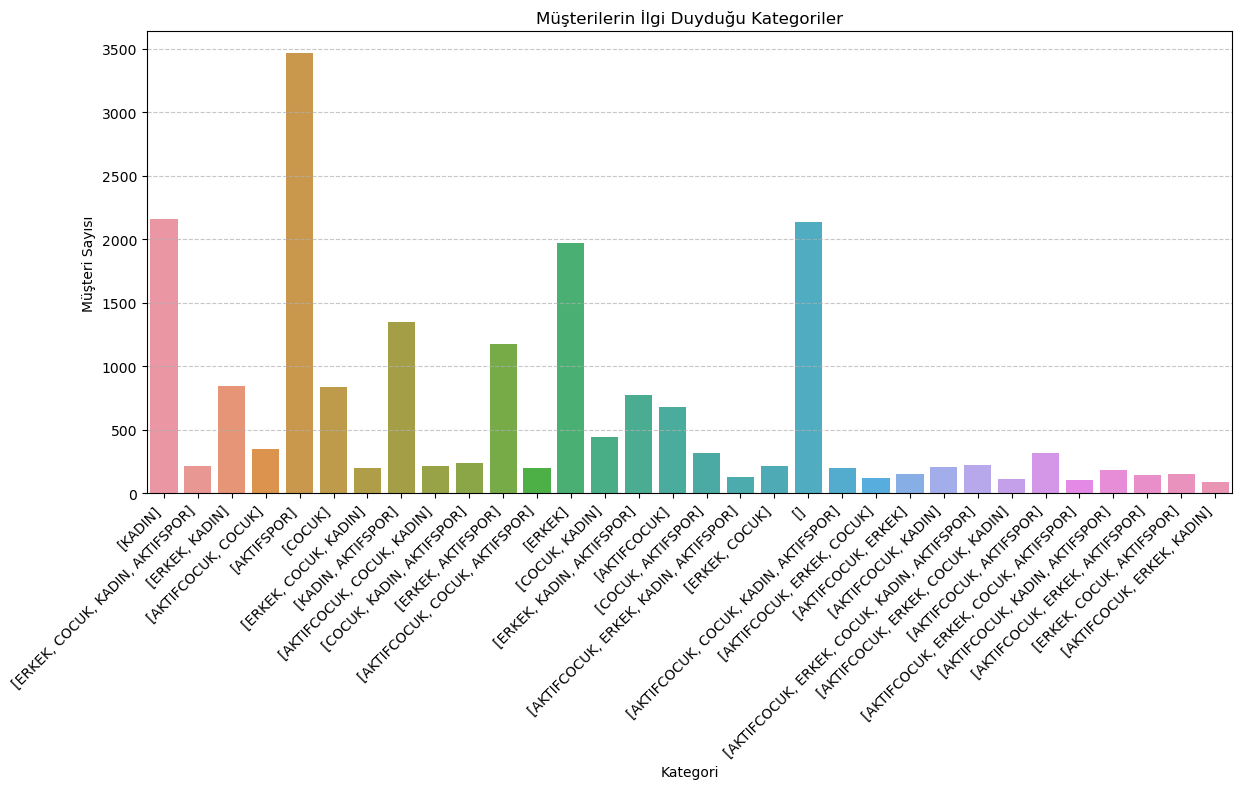

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

category_list = df["interested_in_categories_12"].explode()
category_counts = Counter(category_list)

plt.figure(figsize=(14, 6))
sns.barplot(x=list(category_counts.keys()), y=list(category_counts.values()))

plt.xticks(rotation=45, ha="right")
plt.title("Müşterilerin İlgi Duyduğu Kategoriler")
plt.xlabel("Kategori")
plt.ylabel("Müşteri Sayısı")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

#### Bu grafiğe göre bir çıkarımda bulunursak :
* Kadın kategorisi ve çok kategorili (Erkek-Çocuk-Kadın) gruplar en fazla ilgi gören segmentler olup, müşteri eğilimleri bu yönde yoğunlaşmaktadır.
* Spor kategorileri (Aktif Spor, Aktif Çocuk) de geniş bir müşteri kitlesi tarafından tercih edilerek yükselişte olan segmentler arasında yer almaktadır.
* Bazı spesifik kategoriler diğerlerine göre daha az tercih edilmekte, bu da müşteri ilgisinin belirli alanlara yoğunlaştığını göstermektedir.
* Bu veriler ışığında, popüler segmentlere özel kampanyalar oluşturulabilir, düşük ilgi gören kategoriler için ise tanıtım ve promosyon stratejileri geliştirilebilir.

### Değişken tiplerine bakalım. Tarih içeren değişkenleri date'e çevirelim.

In [29]:
date_columns = df.columns[df.columns.str.contains("date")]
df[date_columns] = df[date_columns].apply(pd.to_datetime)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   master_id                          19945 non-null  object        
 1   order_channel                      19945 non-null  object        
 2   last_order_channel                 19945 non-null  object        
 3   first_order_date                   19945 non-null  datetime64[ns]
 4   last_order_date                    19945 non-null  datetime64[ns]
 5   last_order_date_online             19945 non-null  datetime64[ns]
 6   last_order_date_offline            19945 non-null  datetime64[ns]
 7   order_num_total_ever_online        19945 non-null  float64       
 8   order_num_total_ever_offline       19945 non-null  float64       
 9   customer_value_total_ever_offline  19945 non-null  float64       
 10  customer_value_total_ever_online  

### Her bir müşterinin toplam alışveriş sayısı ve harcaması için yeni değişkenler oluşturalım ve daha genel bir çerçeveden bakalım.

In [28]:
df["order_num_total"] = df["order_num_total_ever_online"] + df["order_num_total_ever_offline"]
df["customer_value_total"] = df["customer_value_total_ever_offline"] + df["customer_value_total_ever_online"]
print(df.head())

                              master_id order_channel last_order_channel  \
0  cc294636-19f0-11eb-8d74-000d3a38a36f   Android App            Offline   
1  f431bd5a-ab7b-11e9-a2fc-000d3a38a36f   Android App             Mobile   
2  69b69676-1a40-11ea-941b-000d3a38a36f   Android App        Android App   
3  1854e56c-491f-11eb-806e-000d3a38a36f   Android App        Android App   
4  d6ea1074-f1f5-11e9-9346-000d3a38a36f       Desktop            Desktop   

  first_order_date last_order_date last_order_date_online  \
0       2020-10-30      2021-02-26             2021-02-21   
1       2017-02-08      2021-02-16             2021-02-16   
2       2019-11-27      2020-11-27             2020-11-27   
3       2021-01-06      2021-01-17             2021-01-17   
4       2019-08-03      2021-03-07             2021-03-07   

  last_order_date_offline  order_num_total_ever_online  \
0              2021-02-26                         4.00   
1              2020-01-10                        19.00   
2 

### Toplam sipariş ve toplam alışveriş tutarı veri setinde olduğuna göre, bir gruplama yapalım. Alışveriş kanallarındaki müşteri sayısının, toplam alınan ürün sayısı ve toplam harcamaların dağılımına bakalım.

In [30]:
df.groupby("order_channel").agg({"master_id":"count",
                                 "order_num_total":"sum",
                                 "customer_value_total":"sum"})

,master_id,order_num_total,customer_value_total
order_channel,,,
Android App,9495,52269.00,7819062.76
Desktop,2735,10920.00,1610321.46
Ios App,2833,15351.00,2525999.93
Mobile,4882,21679.00,3028183.16


- **master_id**: Android App en fazla müşteriye sahipken, Desktop en az müşteri tarafından tercih edilen kanal olmuştur.  
- **order_num_total**: Android App üzerinden verilen siparişler en yüksek seviyedeyken, Desktop kanalı en düşük sipariş hacmine sahiptir.  
- **customer_value_total**: Android App en yüksek toplam harcamayı sağlarken, iOS App daha az müşteriye sahip olmasına rağmen yüksek harcama tutarı ile dikkat çekmektedir.

### En fazla kazancı getiren ilk 5 müşteri

In [32]:
df.sort_values("customer_value_total", ascending=False)[:5]

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,order_num_total,customer_value_total
11150,5d1c466a-9cfd-11e9-9897-000d3a38a36f,Android App,Desktop,2013-10-11,2021-04-30,2021-04-30,2020-12-24,200.00,2.00,684.97,45220.13,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]",202.00,45905.10
4315,d5ef8058-a5c6-11e9-a2fc-000d3a38a36f,Android App,Android App,2018-08-06,2021-02-23,2021-02-23,2020-07-06,67.00,1.00,130.49,36687.80,"[AKTIFCOCUK, ERKEK, KADIN, AKTIFSPOR]",68.00,36818.29
7613,73fd19aa-9e37-11e9-9897-000d3a38a36f,Ios App,Offline,2014-01-14,2021-05-18,2021-01-30,2021-05-18,81.00,1.00,1263.76,32654.34,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",82.00,33918.10
13880,7137a5c0-7aad-11ea-8f20-000d3a38a36f,Ios App,Offline,2021-03-01,2021-04-13,2021-03-18,2021-04-13,10.00,1.00,538.94,30688.47,"[ERKEK, KADIN, AKTIFSPOR]",11.00,31227.41
9055,47a642fe-975b-11eb-8c2a-000d3a38a36f,Android App,Offline,2021-04-07,2021-04-27,2021-04-07,2021-04-27,1.00,3.00,18119.14,2587.20,[AKTIFSPOR],4.00,20706.34


### En fazla sipariş veren ilk 5 müşteri

In [34]:
df.sort_values("order_num_total", ascending=False)[:5]

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,order_num_total,customer_value_total
11150,5d1c466a-9cfd-11e9-9897-000d3a38a36f,Android App,Desktop,2013-10-11,2021-04-30,2021-04-30,2020-12-24,200.00,2.00,684.97,45220.13,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]",202.00,45905.10
7223,cba59206-9dd1-11e9-9897-000d3a38a36f,Android App,Android App,2013-02-21,2021-05-09,2021-05-09,2020-01-25,130.00,1.00,49.99,12232.25,"[AKTIFCOCUK, ERKEK, KADIN, AKTIFSPOR]",131.00,12282.24
8783,a57f4302-b1a8-11e9-89fa-000d3a38a36f,Android App,Offline,2019-08-07,2020-11-04,2020-09-07,2020-11-04,2.00,109.00,10239.46,143.98,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]",111.00,10383.44
2619,fdbe8304-a7ab-11e9-a2fc-000d3a38a36f,Android App,Offline,2018-10-18,2020-06-30,2018-10-18,2020-06-30,1.00,87.00,8432.25,139.98,[ERKEK],88.00,8572.23
6322,329968c6-a0e2-11e9-a2fc-000d3a38a36f,Ios App,Ios App,2019-02-14,2021-04-05,2021-04-05,2020-02-17,2.00,81.00,3997.55,242.81,[ERKEK],83.00,4240.36


* En fazla kazancı getiren ve en fazla sipariş veren ilk kullanıcı aynı.

## 2) RFM Metriklerinin Hesaplanması

In [36]:
df["last_order_date"].max() # 2021-05-30
analysis_date = dt.datetime(2021,6,1)

* RFM Analizi yapılırken analiz tarihi genellike en son alışveriş yapılan tarihten 2 gün sonrası olarak belirlenir. Bunun 3 temel sebebi vardır :
    * 1) Güncelliği koruma
        * Eğer analiz tarihi en son alışveriş yapılan gün olarak belirlenirse, o gün alışveriş yapan müşteriler için Recency (R) değeri sıfır olur ve bu durum analizin doğruluğunu etkileyebilir. 2 gün eklemek, müşterilerin en son alışveriş tarihini doğal bir şekilde sıralamaya sokar ve verinin daha dengeli dağılımını sağlar.
    * 2) İleriye dönük bir öngörü sağlama
        * Analiz tarihi, müşterilerin güncel satın alma davranışlarını belirlemek ve gelecekteki eğilimleri tahmin etmek için kullanılır. 2 gün gibi kısa bir süre eklenmesi, analiz tarihini geçmişten tamamen koparmadan öngörülebilirlik kazandırır.
    * 3) Sezonluk ve Kampanya etkilerinden arınma
        * Özellikle e-ticaret ve perakende sektöründe belirli günlerde yoğun sipariş verilmesi yaygındır (Black Friday, yılbaşı, kampanyalar vs.). 2 günlük ekleme, bu yoğun günlerin etkisini biraz hafifleterek daha dengeli bir RFM segmentasyonu sağlar.

### customer_id, recency, frequency ve monetary değerlerinin yer aldığı yeni bir dataframe oluşturalım.

In [41]:
df["last_order_date"] = pd.to_datetime(df["last_order_date"])
rfm = pd.DataFrame()
rfm["customer_id"] = df["master_id"]
rfm["recency"] = (analysis_date - df["last_order_date"]).dt.days
rfm["frequency"] = df["order_num_total"]
rfm["monetary"] = df["customer_value_total"]

rfm.head()

,customer_id,recency,frequency,monetary
0,cc294636-19f0-11eb-8d74-000d3a38a36f,95,5.00,939.37
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,105,21.00,2013.55
2,69b69676-1a40-11ea-941b-000d3a38a36f,186,5.00,585.32
3,1854e56c-491f-11eb-806e-000d3a38a36f,135,2.00,121.97
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,86,2.00,209.98


## 3) RF ve RFM Skorlarının Hesaplanması

In [44]:
rfm["recency_score"] = pd.qcut(rfm['recency'], 5, labels=[5, 4, 3, 2, 1])
rfm["frequency_score"] = pd.qcut(rfm['frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
rfm["monetary_score"] = pd.qcut(rfm['monetary'], 5, labels=[1, 2, 3, 4, 5])

rfm["RF_SCORE"] = (rfm['recency_score'].astype(str) + rfm['frequency_score'].astype(str))
rfm["RFM_SCORE"] = (rfm['recency_score'].astype(str) + rfm['frequency_score'].astype(str) + rfm['monetary_score'].astype(str))

rfm.head()

,customer_id,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RF_SCORE,RFM_SCORE
0,cc294636-19f0-11eb-8d74-000d3a38a36f,95,5.00,939.37,3,4,4,34,344
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,105,21.00,2013.55,3,5,5,35,355
2,69b69676-1a40-11ea-941b-000d3a38a36f,186,5.00,585.32,2,4,3,24,243
3,1854e56c-491f-11eb-806e-000d3a38a36f,135,2.00,121.97,3,1,1,31,311
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,86,2.00,209.98,3,1,1,31,311


## 4) RF Skorlarının Segment Olarak Tanımlanması

In [45]:
seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}

rfm['segment'] = rfm['RF_SCORE'].replace(seg_map, regex=True)

rfm.head()

,customer_id,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RF_SCORE,RFM_SCORE,segment
0,cc294636-19f0-11eb-8d74-000d3a38a36f,95,5.00,939.37,3,4,4,34,344,loyal_customers
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,105,21.00,2013.55,3,5,5,35,355,loyal_customers
2,69b69676-1a40-11ea-941b-000d3a38a36f,186,5.00,585.32,2,4,3,24,243,at_Risk
3,1854e56c-491f-11eb-806e-000d3a38a36f,135,2.00,121.97,3,1,1,31,311,about_to_sleep
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,86,2.00,209.98,3,1,1,31,311,about_to_sleep


### Segmentlerin recency, frequency ve monetary ortalamalarını inceleyelim.

In [46]:
rfm[["segment", "recency", "frequency", "monetary"]].groupby("segment").agg(["mean", "count"])

recency       frequency       monetary      
                       mean count      mean count     mean count
segment                                                         
about_to_sleep       113.79  1629      2.40  1629   359.01  1629
at_Risk              241.61  3131      4.47  3131   646.61  3131
cant_loose           235.44  1200     10.70  1200  1474.47  1200
champions             17.11  1932      8.93  1932  1406.63  1932
hibernating          247.95  3604      2.39  3604   366.27  3604
loyal_customers       82.59  3361      8.37  3361  1216.82  3361
need_attention       113.83   823      3.73   823   562.14   823
new_customers         17.92   680      2.00   680   339.96   680
potential_loyalists   37.16  2938      3.30  2938   533.18  2938
promising             58.92   647      2.00   647   335.67   647

* Champions müşterileri, Cant Loose müşterilerine göre daha sık alışveriş yapıyor ancak Cant Loose müşterileri geçmişte daha yüksek harcama yapmış.
* At Risk müşterileri, Hibernating müşterilerine göre daha fazla harcama yapmış ve daha sık alışveriş yapmış.
* New Customers, Promising müşterilerinden daha yeni ve alışverişe daha yatkın.
* Loyal Customers, Need Attention segmentine göre daha sık ve yüksek tutarlı alışveriş yapıyor.
* Potential Loyalists, About to Sleep segmentinden daha yeni, daha sık alışveriş yapan ve daha yüksek harcama yapan bir gruptur.

### Soru 1 : Şirket bünyesine yeni bir kadın ayakkabı markası dahil ediyor. Dahil ettiği markanın ürün fiyatları genel müşteri tercihlerinin üstünde. Bu nedenle markanın tanıtımı ve ürün satışları için ilgilenecek profildeki müşterilerle özel olarak iletişime geçilmek isteniliyor. Bu müşterilerin sadık  ve kadın kategorisinden alışveriş yapan kişiler olması planlandı. Bu müşteri ID'lerini bul

In [48]:
target_segments_customer_ids = rfm[rfm["segment"].isin(["champions","loyal_customers"])]["customer_id"]
cust_ids = df[(df["master_id"].isin(target_segments_customer_ids)) &(df["interested_in_categories_12"].str.contains("KADIN"))]["master_id"]
print(cust_ids)
print(cust_ids.shape) # toplam 2497 tane müşteri mevcut.

0        cc294636-19f0-11eb-8d74-000d3a38a36f
1        f431bd5a-ab7b-11e9-a2fc-000d3a38a36f
8        cfbda69e-5b4f-11ea-aca7-000d3a38a36f
11       c2e15af2-9eed-11e9-9897-000d3a38a36f
33       fb840306-1219-11ea-a001-000d3a38a36f
                         ...                 
19912    f63aba0e-41d8-11ea-96d9-000d3a38a36f
19913    81d0da04-a53e-11e9-a2fc-000d3a38a36f
19914    825e6b00-ab40-11e9-a2fc-000d3a38a36f
19917    f8c471c8-2596-11eb-81e9-000d3a38a36f
19926    7e1c15be-6298-11ea-9861-000d3a38a36f
Name: master_id, Length: 2497, dtype: object
(2497,)


### Soru 2: Erkek ve Çoçuk ürünlerinde %40'a yakın indirim planlanmaktadır. Bu indirimle ilgili kategorilerle ilgilenen geçmişte iyi müşterilerden olan ama uzun süredir alışveriş yapmayan ve yeni gelen müşteriler özel olarak hedef alınmak isteniliyor. Bu müşterilerin ID numaralarını bul

In [54]:
target_segments_customer_ids = rfm[rfm["segment"].isin(["cant_loose","hibernating","new_customers"])]["customer_id"]
cust_ids = df[(df["master_id"].isin(target_segments_customer_ids)) & ((df["interested_in_categories_12"].str.contains("ERKEK"))|(df["interested_in_categories_12"].str.contains("COCUK")))]["master_id"]
print(cust_ids)
print(cust_ids.shape) # toplam 2771 müşteri.

7        3f1b4dc8-8a7d-11ea-8ec0-000d3a38a36f
10       ae608ece-c9d8-11ea-a31e-000d3a38a36f
15       13ed97a4-b167-11e9-89fa-000d3a38a36f
19       2730793e-3908-11ea-85d6-000d3a38a36f
21       7b289956-d691-11e9-93bc-000d3a38a36f
                         ...                 
19910    7ab86f3e-b244-11ea-b736-000d3a38a36f
19928    8ef8cfc4-606f-11ea-8dd8-000d3a38a36f
19932    13a5e98c-a824-11e9-a2fc-000d3a38a36f
19933    6d285c64-5e73-11ea-be5b-000d3a38a36f
19936    1982ac0e-9f4c-11e9-9897-000d3a38a36f
Name: master_id, Length: 2771, dtype: object
(2771,)
